In [2]:
import numpy as np

x_in = np.linspace(-6, 6, 25)
sigmoid = lambda x: 1/(1 + np.exp(-x))
result = sigmoid(x_in)

fp_convert = lambda x: np.round(x * (2 ** 12))

def pla(x_in, slopes, intercepts, breakpoints):
  result = np.zeros_like(x_in, dtype=float)
  
  result[x_in <= breakpoints[0]] = 0
  result[x_in > breakpoints[-1]] = 1
  
  for i in range(len(breakpoints) - 1):
    mask = (x_in > breakpoints[i]) & (x_in <= breakpoints[i + 1])
    result[mask] = slopes[i] * x_in[mask] + intercepts[i]
    
  return result

In [3]:
slopes4 = np.array([0.01498, 0.15086, 0.15085, 0.01498])
intercepts4 = np.array([0.09328, 0.50000, 0.50000, 0.90762])
breakpoints4 = np.array([-6, -3, 0, 3, 6])
result4 = pla(x_in, slopes4, intercepts4, breakpoints4)

slopes4_fp = fp_convert(slopes4)
intercepts4_fp = fp_convert(intercepts4)
breakpoints4_fp = fp_convert(breakpoints4)

In [4]:
slopes8 = np.array([0.00568, 0.02429, 0.09000, 0.21172, 0.21172, 0.09000, 0.02429, 0.00568])
intercepts8 = np.array([0.03653, 0.12030, 0.31743, 0.50000, 0.50000, 0.68257, 0.87970, 0.96347])
breakpoints8 = np.array([-6, -4.5, -3, -1.5, 0, 1.5, 3, 4.5, 6])
result8 = pla(x_in, slopes8, intercepts8, breakpoints8)

slopes8_fp = fp_convert(slopes8)
intercepts8_fp = fp_convert(intercepts8)
breakpoints8_fp = fp_convert(breakpoints8)

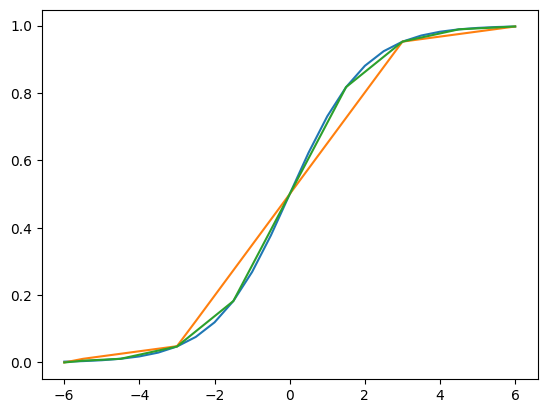

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

res = ax.plot(x_in, result, label='result')
res4 = ax.plot(x_in, result4, label='result4')
res8 = ax.plot(x_in, result8, label='result8')

In [16]:
x_test = np.array([-7, -5, -4, -3, -2, -1.5, -1, 0, 1, 1.5, 2, 3, 4, 5, 7])
result_test = pla(x_test, slopes8, intercepts8, breakpoints8)
print(result_test)

[0.      0.00813 0.02314 0.04743 0.13743 0.18243 0.28828 0.5     0.71172
 0.81758 0.86257 0.95257 0.97686 0.99187 1.     ]


In [15]:
print(breakpoints8_fp)

[-24576. -18432. -12288.  -6144.      0.   6144.  12288.  18432.  24576.]
